In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import geopandas as gpd
from shapely.geometry import Point
from kalpana.tools import readNodes_fort14

In [2]:
pathin = Path(r'../models/adcirc/concorde/batch02')

In [3]:
## first set of simulations. I used SABv5 and ran the models on ANVIL
df01 = pd.read_csv(pathin/'01'/'_postprocessing'/'logFiles_230802_anvil_01.csv', index_col = 0, dtype=str)
df01 = df01.sort_values('run')
df01.index = range(len(df01))

## second set of simulations. I used SABv5 with the bathy corrected in the bahamas, ran the models on HAZEL
df02 = pd.read_csv(pathin/'02'/'_postprocessing'/'logFiles_190923_hazel_02.csv', index_col = 0, dtype=str)
df02 = df02.sort_values('run')
df02.index = range(len(df02))

## 3rd set of simulations. I used SABv5 with the bathy corrected in the bahamas, ran the models on Stampede2. Storms from 431 to 500
df02b = pd.read_csv(pathin/'02b'/'_postprocessing'/'logFiles_140923_stampede2_02.csv', index_col = 0, dtype=str)
df02b = df02b.sort_values('run')
df02b.index = range(len(df02b))

## 4th set of simulations. I used SABv5 with the bathy corrected in the bahamas and slope limiter from NC9, ran the models on HAZEL
df03 = pd.read_csv(pathin/'03'/'_postprocessing'/'logFiles_140923_hazel_03.csv', index_col = 0, dtype=str)
df03 = df03.sort_values('run')
df02.index = range(len(df02))

## 5th set of simulations. I used SABv5 with the bathy corrected in the bahamas and slope limiter interpolated from NC9, ran the models on Stampede2
df03b = pd.read_csv(pathin/'03b'/'_postprocessing'/'logFiles_140923_stampede2_03.csv', index_col = 0, dtype=str)
df03b = df03b.sort_values('run')
df03b.index = range(len(df03b))

In [4]:
df01['batch'] = ['01']*len(df01)
df02['batch'] = ['02']*len(df02)
df02b['batch'] = ['02b']*len(df02b)
df03['batch'] = ['03']*len(df03)
df03b['batch'] = ['03b']*len(df03b)

In [5]:
df01All = pd.DataFrame(index = range(1814), columns = df01.columns)
df01All.loc[df01.index, :] = df01

df02All = pd.DataFrame(index = range(1814), columns = df02.columns)
df02All.loc[df02.index, :] = df02

df02bAll = pd.DataFrame(index = range(1814), columns = df02b.columns)
df02bAll.loc[df02b.index, :] = df02b

df03All = pd.DataFrame(index = range(1814), columns = df03.columns)
df03All.loc[df03.index, :] = df03

df03bAll = pd.DataFrame(index = range(1814), columns = df03b.columns)
df03bAll.loc[df03b.index, :] = df03b

In [6]:
dfAll = (pd.concat([df01All, df02All, df02bAll, df03All, df03bAll])
        .sort_values('run')
        .dropna(how = 'all'))
dfAll['orgInidex'] = dfAll.index
dfAll.index = range(len(dfAll))
dfAll['ncores'] = dfAll['ncores'].fillna(0)
dfAll['ncores'] = [float(x) for x in dfAll['ncores']]

aux = []
for x in dfAll.index:
    if dfAll.loc[x, 'batch']  == '01' and dfAll.loc[x, 'ncores'] == 0:
        aux.append(256)
    elif dfAll.loc[x, 'batch']  == '02' and dfAll.loc[x, 'ncores'] == 0:
        aux.append(192)
    elif dfAll.loc[x, 'batch']  == '02b' and dfAll.loc[x, 'ncores'] == 0:
        aux.append(192)
    elif dfAll.loc[x, 'batch']  == '03b' and dfAll.loc[x, 'ncores'] == 0:
        aux.append(192)
    else:
        aux.append(int(dfAll.loc[x, 'ncores']))
dfAll['ncores2'] = aux
dfAll

,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2
0,0000,0,complete,0000.2196518,NaN,NaN,NaN,01,0.0,0,256
1,0001,0,ADCIRC blow-up,0001.2196519,471917.0,479041.0,64.81%,01,0.0,1,256
2,0001,10.924166666666666,complete,0001.719080,NaN,NaN,NaN,02,0.0,0,192
3,0002,0,complete,0002.2196520,NaN,NaN,NaN,01,0.0,2,256
4,0003,0,complete,0003.2196521,NaN,NaN,NaN,01,0.0,3,256
...,...,...,...,...,...,...,...,...,...,...,...
2266,1811,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,02b,192.0,1080,192
2267,1812,5.638055555555556,complete,1812.988903,NaN,NaN,NaN,02,192.0,554,192
2268,1812,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,02b,192.0,1081,192
2269,1813,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,02b,192.0,1082,192


In [7]:
mails1 = pd.read_csv(r'../models/adcirc/concorde/batch02/Gmail_export_310823.csv')
mails2 = pd.read_csv(r'../models/adcirc/concorde/batch02/Gmail_export_070923.csv')
mails3 = pd.read_csv(r'../models/adcirc/concorde/batch02/Gmail_export_140923.csv')
mails2.index = range(len(mails1), len(mails1) + len(mails2))
mails3.index = range(len(mails2), len(mails2) + len(mails3))
mails = pd.concat([mails1, mails2, mails3])

In [8]:
subjects = mails['Subject'].to_list()
subjects = [x for x in subjects if 'Began' not in x]
dts = []
for i in dfAll.index:
    aux0 = dfAll.loc[i, :]
    if aux0['log'] == 'noLogFile':
        dts.append(np.nan)
    else:
        if aux0['batch'] == '02':
            dts.append(float(aux0['dt']))
        elif aux0['batch'] == '03':
            dts.append(float(aux0['dt']))
        else:
            run = str(aux0['run']).zfill(4)
            job = str(aux0['log']).split('.')[1]
            aux1 = [x for x in subjects if x.startswith(f'Slurm Job_id={job} Name={run}')]
            if len(aux1) == 0:
                dts.append(np.nan)
            else:
                aux2 = aux1[0].split(',')[1].split()[-1].split(':')
                dt = int(aux2[0]) + int(aux2[1])/60 + int(aux2[2])/3600
                dts.append(dt)

dfAll['dt2'] = dts
dfAll

,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2,dt2
0,0000,0,complete,0000.2196518,NaN,NaN,NaN,01,0.0,0,256,2.488056
1,0001,0,ADCIRC blow-up,0001.2196519,471917.0,479041.0,64.81%,01,0.0,1,256,3.837500
2,0001,10.924166666666666,complete,0001.719080,NaN,NaN,NaN,02,0.0,0,192,10.924167
3,0002,0,complete,0002.2196520,NaN,NaN,NaN,01,0.0,2,256,7.276944
4,0003,0,complete,0003.2196521,NaN,NaN,NaN,01,0.0,3,256,2.216389
...,...,...,...,...,...,...,...,...,...,...,...,...
2266,1811,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,02b,192.0,1080,192,NaN
2267,1812,5.638055555555556,complete,1812.988903,NaN,NaN,NaN,02,192.0,554,192,5.638056
2268,1812,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,02b,192.0,1081,192,NaN
2269,1813,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,noLogFile,02b,192.0,1082,192,NaN


In [9]:
## total cpu hours
(dfAll['dt2'] * dfAll['ncores2']).sum()

1566824.551111111

In [10]:
dfComplete = dfAll[dfAll['status'] == 'complete'].drop_duplicates('run')
print(len(dfComplete))
dfComplete.head()

1813


,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2,dt2
0,0000,0,complete,0000.2196518,NaN,NaN,NaN,01,0.0,0,256,2.488056
2,0001,10.924166666666666,complete,0001.719080,NaN,NaN,NaN,02,0.0,0,192,10.924167
3,0002,0,complete,0002.2196520,NaN,NaN,NaN,01,0.0,2,256,7.276944
4,0003,0,complete,0003.2196521,NaN,NaN,NaN,01,0.0,3,256,2.216389
5,0004,0,complete,0004.2196522,NaN,NaN,NaN,01,0.0,4,256,3.177500


In [11]:
## cpu hours complete simulations
(dfComplete['dt2'] * dfComplete['ncores2']).sum()

1337443.911111111

In [12]:
dfFailed = dfAll[dfAll['status'] != 'complete']
dfFailed.index = range(len(dfFailed))

dfFailed2 = dfFailed.copy()
for i in dfFailed.index:
    if dfFailed.loc[i, 'run'] in list(dfComplete['run']):
        #print(f"Sim {dfFailed.loc[i, 'run']} finish succesfully")
        dfFailed2 = dfFailed2.drop(i)
    else:
        pass
        # print(f"Sim {dfFailed.loc[i, 'run']} failed")
dfFailed = dfFailed2.copy()
# dfFailed = dfFailed.drop_duplicates('run')
print(len(dfFailed))
dfFailed.head()

2


,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2,dt2
177,0623,0,ADCIRC blow-up,0623.11641983,419320,425040,84.13%,02b,192.0,192,192,3.033889
178,0623,0,ADCIRC blow-up,0623.11711059,419320.0,425040.0,84.13%,03b,192.0,40,192,3.285278


In [13]:
dfNoLog = dfFailed[dfFailed['status'] == 'noLogFile']
dfReRun = dfFailed[dfFailed['status'] != 'noLogFile']

In [14]:
dfReRun['status'].unique()

array(['ADCIRC blow-up'], dtype=object)

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
dfAll.to_csv(r'/mnt/drive1/Insyncs/NCSU/thesis/models/adcirc/concorde/batch02/_postprocessing/logFiles_ALL_batch02_200923.csv')

In [23]:
dfComplete.to_csv(r'/mnt/drive1/Insyncs/NCSU/thesis/models/adcirc/concorde/batch02/_postprocessing/logFiles_COMPLETE_batch02_200923.csv')

In [ ]:
dfF

In [16]:
dfNoLog2 = dfNoLog.copy()
for i in dfNoLog.index:
    if dfNoLog.loc[i, 'run'] in list(dfReRun['run']):
        #print(f"Sim {dfFailed.loc[i, 'run']} finish succesfully")
        dfNoLog2 = dfNoLog2.drop(i)
    else:
        pass
        # print(f"Sim {dfFailed.loc[i, 'run']} failed")
dfNoLog = dfNoLog2.copy()
print(len(dfNoLog))
dfNoLog.head()

0


,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2,dt2


In [17]:
dfReRun = dfReRun.drop_duplicates('run')
dfReRun

,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2,dt2
177,0623,0,ADCIRC blow-up,0623.11641983,419320,425040,84.13%,02b,192.0,192,192,3.033889


In [20]:
dfReRun.to_csv(r'../models/adcirc/concorde/batch02/runs_batch03.csv')

In [85]:
len(dfReRun) + len(dfComplete)

1814

#### Export nodes of blowup

In [33]:
f14 = r'../models/adcirc/concorde/batch02/02/_template/fort.14'
dff14 = readNodes_fort14(f14)

In [45]:
xs, ys = [], []
for r in dfReRun.index:
    node = dfReRun.loc[r, 'nodeElevWarning']
    aux = dff14.loc[float(node) - 1, :]
    xs.append(aux['x'])
    ys.append(aux['y'])
pnts = [Point(x, y) for x, y in zip(xs, ys)]
gdfBlowUp = gpd.GeoDataFrame(geometry = pnts, crs = 4326)

In [46]:
gdfBlowUp.to_file(r'../gis/gpkg/location_blowups_batch02.gpkg', driver = 'GPKG')

#### Check if complete simulations match with archived tarballs

In [20]:
# ## first set of simulations. I used SABv5 and ran the models on ANVIL
# dfarc01 = pd.read_csv(pathin/'01'/'_postprocessing'/'archivedRuns_by_06092023.txt', 
#                         dtype=str, header = None)

# # ## second set of simulations. I used SABv5 with the bathy corrected in the bahamas, ran the models on HAZEL
# dfarc02 = pd.read_csv(pathin/'02'/'_postprocessing'/'archivedRuns_by_06092023.txt', 
#                         header = None, dtype=str)

# # ## 3rd set of simulations. I used SABv5 with the bathy corrected in the bahamas, ran the models on Stampede2. Storms from 431 to 500
# dfarc02b = pd.read_csv(pathin/'02b'/'_postprocessing'/'archivedRuns_by_08092023.txt', 
#                         header = None, dtype=str)
# # df02b = df02b.sort_values('run')
# # df02b.index = range(len(df02b))

# dfarc = pd.concat([dfarc01, dfarc02, dfarc02b], axis = 0)
# dfarc['run'] = [x[:4] for x in dfarc.iloc[:, 0]]
# dfarc = dfarc.sort_values('run')
# dfarc.index = range(len(dfarc))

In [101]:
with open(r'../models/adcirc/concorde/batch02/_postprocessing/archived_batch02_140923.csv', 'r') as fin:
    runs = fin.readlines()
archived = [x[:-1] for x in runs]

In [94]:
notArchived = []
for i, j in enumerate(dfComplete['run']):
    # if j not in dfarc['run'].to_list():
    if j not in runs:
        notArchived.append(i)
dfNotArchived = dfComplete.iloc[notArchived, :]
dfNotArchived

,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2,dt2


In [50]:
# dfNotArchived.to_csv(r'../models/adcirc/concorde/batch02/02b/_postprocessing/notArchivedRuns_by_06092023.txt')

##### Check if failed simulations match non archived runs

In [41]:
aux = [str(z).zfill(4) for z in range(1814)]

In [43]:
failed = [x for x in aux if x not in dfComplete['run'].to_list()]

In [44]:
len(failed)

197

In [48]:
checkFailed = [x for x in failed if x not in dfReRun['run'].to_list()]
checkFailed

[]

##### Check file sizes

In [110]:
# ## first set of simulations. I used SABv5 and ran the models on ANVIL
# dfsize01 = pd.read_csv(pathin/'01'/'_postprocessing'/'files_size_batch02_01.csv', index_col = 0)

# # ## second set of simulations. I used SABv5 with the bathy corrected in the bahamas, ran the models on HAZEL
# dfsize02 = pd.read_csv(pathin/'02'/'_postprocessing'/'files_size_batch02_02.csv', index_col = 0)

# # ## 3rd set of simulations. I used SABv5 with the bathy corrected in the bahamas, ran the models on Stampede2. Storms from 431 to 500
# dfsize02b = pd.read_csv(pathin/'02b'/'_postprocessing'/'files_size_batch02_02b.csv', index_col = 0)
# # df02b = df02b.sort_values('run')
# # df02b.index = range(len(df02b))
# pathin = Path(r'../models/adcirc/concorde/batch02/_postprocessing/files_size_batch02_110923.csv')
pathin = Path(r'/media/tacuevas/Extreme SSD/batch02')
lruns = sorted([x for x in os.listdir(pathin)])
aux0 = []
for r in lruns:
    aux1 = []
    for f in ['fort.63.nc', 'maxele.63.nc']:
        aux1.append(os.path.getsize(pathin/r/f))
    aux0.append(aux1)

In [111]:
dfSSD = pd.DataFrame(aux0, index = lruns, columns = ['fort.63.nc', 'maxele.63.nc'])

In [112]:
notExtracted = [x for x in archived if x not in dfSSD.index.to_list()]

In [113]:
dfComplete[dfComplete['run'].isin(notExtracted)]

,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,ncores,orgInidex,ncores2,dt2


In [117]:
(dfSSD/1e6).describe().T

,count,mean,std,min,25%,50%,75%,max
fort.63.nc,1814.0,1292.337997,1609.850320,711.401664,1081.545496,1253.320481,1343.1415,68503.450664
maxele.63.nc,1814.0,47.576914,0.507583,46.686521,47.134034,47.563132,47.9851,48.949787


In [10]:
dfsize = pd.read_csv(pathin, index_col = 0)
dfsize = dfsize.sort_values('run')

In [16]:
dfsize[dfsize['maxele.63.nc'] < 0.044]

,maxele.63.nc,fort.63.nc,setup,run
5,0.038778,0.038726,02,5
421,0.038778,1.148475,02,421


<Axes: >

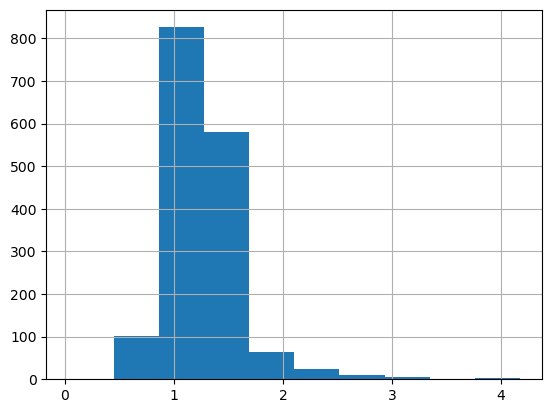

In [13]:
dfsize['fort.63.nc'].hist()

In [69]:
dfsize = pd.concat([dfsize01, dfsize02, dfsize02b], axis = 0)
dfsize = dfsize.sort_index()
dfsize['run'] = [str(x).zfill(4) for x in dfsize.index]
dfsize.head()

,maxele.63.nc,fort.63.nc,run
0,0.048333,1.476314,0000
1,0.046818,1.388518,0001
2,0.047406,4.170292,0002
3,0.047089,1.272012,0003
4,0.046776,1.826654,0004


array([[<Axes: title={'center': 'maxele.63.nc'}>,
        <Axes: title={'center': 'fort.63.nc'}>],
       [<Axes: title={'center': 'run'}>, <Axes: >]], dtype=object)

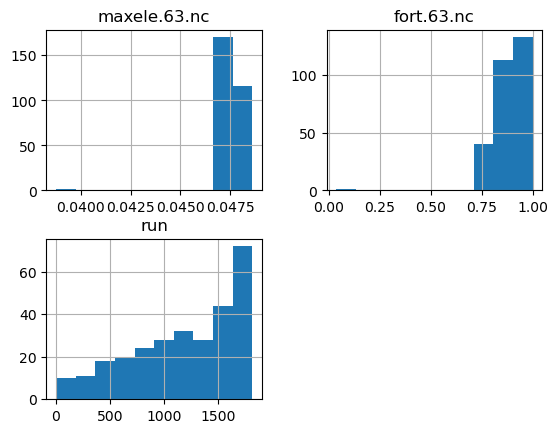

In [15]:
dfsize[dfsize['fort.63.nc'] < 1].hist()

In [77]:
dummy = dfComplete[dfComplete['run'].isin(dfsize[dfsize['maxele.63.nc'] < 0.04]['run'])]
dummy = dummy[dummy['batch'] == '02b']

In [80]:
dummy.to_csv(r'/mnt/drive1/Insyncs/NCSU/thesis/models/adcirc/concorde/batch02/02b/run_again_080923.csv')

In [81]:
dummy

,run,dt,status,log,nodeElevWarning,nodeSpeedWarning,perWarning,batch,cores,dummy,dt2
949,1680,0,complete,1680.11682660,NaN,NaN,NaN,02b,192,1883,3.951944
950,1681,0,complete,1681.11682661,NaN,NaN,NaN,02b,192,1884,3.701667
951,1682,0,complete,1682.11682662,NaN,NaN,NaN,02b,192,1885,2.535556
952,1683,0,complete,1683.11682663,NaN,NaN,NaN,02b,192,1886,2.866944
953,1684,0,complete,1684.11682664,NaN,NaN,NaN,02b,192,1887,3.842500
954,1685,0,complete,1685.11682665,NaN,NaN,NaN,02b,192,1888,4.137500
955,1686,0,complete,1686.11682666,NaN,NaN,NaN,02b,192,1889,3.304722
957,1688,0,complete,1688.11682668,NaN,NaN,NaN,02b,192,1891,3.828056
959,1690,0,complete,1690.11682670,NaN,NaN,NaN,02b,192,1893,3.784167
960,1691,0,complete,1691.11682671,NaN,NaN,NaN,02b,192,1894,2.999167


In [82]:
128*4+192

704